In [1]:
import pandas as pd
# for plots
import matplotlib
#%matplotlib qt
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0) # bigger figure!
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("husl", 5))
sns.set(style="whitegrid",font_scale=3)


In [2]:
action_log_df = pd.read_csv('action_logger.csv', names=['user_id','session_number','action_id','validation_timestamp','validation_state_id',\
	'action','style','duration','validation','trigger_timestamp','trigger_state_id'])

#action_log_df

In [7]:
#MLP: learner suggestions
learner_eng_actions_mlp = action_log_df[(action_log_df['validation']!='CONTROL') & (action_log_df['action']!='WALK') & (action_log_df['action']!='RUN') & (action_log_df['validation']!='STYLE_UPDATE') & (action_log_df['validation']!='UNPROMPTED') & (action_log_df['trigger_timestamp']>= 1564151501.33) & (action_log_df['action']!='WALK') & (action_log_df['action']!='RUN') & (action_log_df['validation']!='STYLE_UPDATE') & (action_log_df['validation']!='UNPROMPTED') & (action_log_df['trigger_timestamp'] < 1565959936.0)].copy()

learner_eng_actions_mlp.groupby(['user_id','session_number']).size().reset_index().rename(columns={0:'count'})

,user_id,session_number,count
0,DB,11,21
1,DB,12,30
2,DB,13,16
3,DB,14,36
4,DB,15,50
5,DB,16,17
6,DP,18,71
7,DP,19,33
8,DP,20,39
9,DP,21,45


In [6]:
learner_eng_actions_mlp['action'].value_counts()

PRAISE        992
TIME          474
CHALLENGE     105
HUMOUR         83
SYMPATHISE     47
CHECKPRE       30
MAINTAIN       30
Name: action, dtype: int64

In [12]:
learner_eng_actions_mlp['validation'].value_counts(normalize=True)

REFUSED             0.758601
VALIDATED           0.195149
PASSIVE_ACCEPTED    0.046249
Name: validation, dtype: float64

In [9]:
#KNN Week 9+: learner suggestions
learner_eng_actions_knn = action_log_df[(action_log_df['validation']!='CONTROL') & (action_log_df['action']!='WALK') & (action_log_df['action']!='RUN') & (action_log_df['validation']!='STYLE_UPDATE') & (action_log_df['validation']!='UNPROMPTED') & (action_log_df['trigger_timestamp']>= 1565959936.0) & (action_log_df['action']!='WALK') & (action_log_df['action']!='RUN') & (action_log_df['validation']!='STYLE_UPDATE') & (action_log_df['validation']!='UNPROMPTED')].copy()

learner_eng_actions_knn.groupby(['user_id','session_number']).size().reset_index().rename(columns={0:'count'})

,user_id,session_number,count
0,JF,21,99


In [10]:
learner_eng_actions_knn['action'].value_counts()

PRAISE        39
MAINTAIN      28
SYMPATHISE    10
TIME           8
HUMOUR         8
CHALLENGE      6
Name: action, dtype: int64

In [11]:
learner_eng_actions_knn['validation'].value_counts(normalize=True)

REFUSED             0.828283
VALIDATED           0.161616
PASSIVE_ACCEPTED    0.010101
Name: validation, dtype: float64

In [10]:
learner_eng_actions_gb_21 = learner_eng_actions_mlp[(learner_eng_actions_mlp['user_id']=='GB') & (learner_eng_actions_mlp['session_number']==21)]
learner_eng_actions_gb_21

,user_id,session_number,action_id,validation_timestamp,validation_state_id,action,style,duration,validation,trigger_timestamp,trigger_state_id
59767,GB,21,2f6df6c8-3101-4217-a856-cf353e6b4fc2,1.565800e+09,dfe56304-8a2c-4f3f-8a7c-e49e90e31842,PRAISE,POSITIVE,0,VALIDATED,1.565800e+09,639cb020-a91e-48fa-8bb8-4504e39c980b
59770,GB,21,5d084ea9-2aac-4ac1-b042-535fa50fcab5,1.565800e+09,22601682-c4c7-42e1-82fc-c7e210df6ed9,PRAISE,POSITIVE,0,VALIDATED,1.565800e+09,b02ba72c-5234-4432-b035-5fcc73789b9e
59773,GB,21,e96885d1-ef24-4822-933b-fb3bb19d12fc,1.565800e+09,be856452-569c-4c55-967b-e6131080de11,PRAISE,POSITIVE,0,REFUSED,1.565800e+09,203deac2-168f-45e3-8508-780f3c41428c
59776,GB,21,1b38e140-b10d-44ca-8a5b-bb0d73cadc6f,1.565800e+09,7b6f33db-6fd8-434d-be6d-a7646f45ef1c,PRAISE,POSITIVE,0,REFUSED,1.565800e+09,6db622c8-9df2-46df-b980-70a574eedb1f
59779,GB,21,2fa7dc28-0934-4176-9f90-7c75b5562171,1.565800e+09,49af9bb9-f35f-4291-b945-3cb82324b8d1,PRAISE,POSITIVE,0,REFUSED,1.565800e+09,148cb81d-7dbd-4e33-b1c5-ce42ceaf9c2d
59783,GB,21,3e22d445-ab23-484f-8e21-03283056b643,1.565800e+09,48a59b4c-27fb-4d55-b11c-546b3d685565,PRAISE,POSITIVE,0,REFUSED,1.565800e+09,fb5234af-37af-4f44-be6a-774ccd85a138
59786,GB,21,5fc4ae19-9799-4200-a32f-b06c996086cd,1.565800e+09,fef1a448-fcc1-49e6-ba3a-051a8c46f08a,PRAISE,SYMPATHETIC,0,VALIDATED,1.565800e+09,06337033-3819-4625-a34b-b1f26cada20f
59789,GB,21,422fd797-41d5-4f70-8303-7b13bd7c0398,1.565800e+09,e39e0ee9-1578-4350-96ae-58c98ff89d3e,PRAISE,SYMPATHETIC,0,REFUSED,1.565800e+09,dda3dde3-c87a-4173-914c-e989d95b723d
59792,GB,21,ec941ee6-56ab-44cd-89b4-efffd08bf2b5,1.565800e+09,9e2b2eed-64a7-4ae1-a7e4-0a4701dabf9c,PRAISE,SYMPATHETIC,0,REFUSED,1.565800e+09,446d9c42-051f-476c-80ef-015f49b9f75d
59795,GB,21,e617e3fc-c139-4164-a929-de2a414421fb,1.565800e+09,340d9996-9b20-476c-a5b7-0778331927bf,PRAISE,SYMPATHETIC,0,REFUSED,1.565800e+09,aa6f66f9-44ec-4efe-90b0-17283345c1b4


In [65]:
learner_eng_actions_jw_21 = learner_eng_actions_mlp[(learner_eng_actions_mlp['user_id']=='JW') & (learner_eng_actions_mlp['session_number']==21)]
learner_eng_actions_jw_21

,user_id,session_number,action_id,validation_timestamp,validation_state_id,action,style,duration,validation,trigger_timestamp,trigger_state_id
60109,JW,21,38a6aa49-3b6e-4c92-9d88-48a819ea3687,1.565883e+09,f55d3249-c9c2-4239-a2d5-efb958614856,TIME,POSITIVE,0,VALIDATED,1.565883e+09,31125786-8c26-4807-a046-f655249ae14c
60112,JW,21,6e039e88-afd8-4acd-a254-f75eafbea516,1.565883e+09,f56581d4-53b4-4a36-92f3-8e9d7f88ba7c,PRAISE,POSITIVE,0,REFUSED,1.565883e+09,fc6e77e4-d1e9-43a9-88cb-d4a7cb897dd1
60120,JW,21,a9a6363c-8ec5-4365-b317-cadc2ae1ac4b,1.565883e+09,3e1945b4-2b6d-447d-b253-410dba54a9a1,PRAISE,POSITIVE,0,VALIDATED,1.565883e+09,cce246bb-c372-4814-bafc-e051d1562afe
60123,JW,21,d6ef4ec2-6a6d-43d6-9345-8d23e03cb517,1.565883e+09,e1e1f14c-1393-405d-b0e7-d05a0893f55c,PRAISE,POSITIVE,0,REFUSED,1.565883e+09,c367d46d-a477-42e9-a856-0e145cb68c15
60126,JW,21,b4268c9c-92f4-496a-8f0f-8130e298123b,1.565883e+09,478a8398-9b04-45af-afe8-fde7cfe26801,PRAISE,POSITIVE,0,REFUSED,1.565883e+09,cd531e79-7a18-4ad2-a53a-b35bafce0854
60131,JW,21,03abc833-9818-429f-b06f-3645cb940c42,1.565883e+09,faa79d35-f7ee-4467-a512-7123e3ba85b9,PRAISE,SYMPATHETIC,0,VALIDATED,1.565883e+09,18654028-f51c-4689-969f-a51353ffabcb
60135,JW,21,e9f3739f-b5af-46d2-9393-c7ef979b96ff,1.565883e+09,bfc1b933-1492-4f0a-8801-c25ba2c5a756,PRAISE,SYMPATHETIC,0,REFUSED,1.565883e+09,0cddd53e-4447-41eb-ae7a-c8236aac9575
60226,JW,21,b50a6592-0947-4300-a8de-2d015f018099,1.565883e+09,5ea19103-9322-4926-9128-2d8960c10eff,PRAISE,SYMPATHETIC,0,VALIDATED,1.565883e+09,a777d97a-5687-468c-895d-966e57803719
60231,JW,21,95753093-9a07-4b4c-9209-780d08551bd9,1.565883e+09,b22aa003-d61c-46c7-b994-09749139ec99,PRAISE,SYMPATHETIC,0,REFUSED,1.565883e+09,fd52c0b8-0300-4deb-a4e4-fa7cc1fcb95d
60232,JW,21,147417a3-d163-4946-ac07-6b8412546d6d,1.565883e+09,bda3983a-f298-4ee8-8ca1-bc421018afd2,PRAISE,SYMPATHETIC,0,REFUSED,1.565883e+09,f867231a-7cba-43b7-862c-31cbacaa3581


In [11]:
learner_eng_actions_gb_22 = learner_eng_actions_mlp[(learner_eng_actions_mlp['user_id']=='GB') & (learner_eng_actions_mlp['session_number']==22)]
learner_eng_actions_gb_22

,user_id,session_number,action_id,validation_timestamp,validation_state_id,action,style,duration,validation,trigger_timestamp,trigger_state_id
59940,GB,22,70dd5408-75c8-4579-ad60-06ccaead80d6,1.565870e+09,61bc7e10-13e5-461c-aca2-481cf9f2f8a1,PRAISE,SYMPATHETIC,0,PASSIVE_ACCEPTED,1.565870e+09,7f6a076f-0bcd-4f4c-be1a-ef5dfc6fb868
59942,GB,22,90836f3a-d3f8-4a44-9c13-5c1cc2773676,1.565870e+09,ae5e3471-54c0-4a84-8c56-75af90c3dca2,PRAISE,SYMPATHETIC,0,PASSIVE_ACCEPTED,1.565870e+09,e8c9178a-e142-4002-aa08-26c492c2994d
59943,GB,22,66dc6a8a-12df-4bce-90a5-4d80b2c85124,1.565870e+09,c5758d74-6a5e-4855-8cdc-d94de52a79b1,PRAISE,SYMPATHETIC,0,PASSIVE_ACCEPTED,1.565870e+09,f69f8095-4b0d-40a4-9c5c-99036f56f91d


In [70]:
learner_eng_actions_dp_22 = learner_eng_actions_mlp[(learner_eng_actions_mlp['user_id']=='PT') & (learner_eng_actions_mlp['session_number']==17)]
learner_eng_actions_dp_22['action'].value_counts()

TIME          11
PRAISE         6
SYMPATHISE     2
CHALLENGE      1
Name: action, dtype: int64

In [14]:
state_log_df = pd.read_csv('state_logger.csv', names=['timestamp','state_id','user_id','condition','self_attitude','expert_attitude','extraversion',\
	'agreeableness','conscientiousness','emotional_stability','openness_experience','activity_level','session_number','programme_state','task_success','session_time',\
	'session_time_remaining','normalised_session_time','programme_time','normalised_programme_time','time_spent_prog_action','time_remain_prog_action',\
	'prog_action_progress','prog_action_duration','speed','relative_speed_average','relative_speed_best','time_since_last_action','normalised_time_since_last_action',\
	'heart_rate','relative_heart_rate','au12','au25','mood','user_run_pb','user_walk_pb','user_run_avg','user_walk_avg'])

state_log_df.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,state_id,user_id,condition,self_attitude,expert_attitude,extraversion,agreeableness,conscientiousness,emotional_stability,...,normalised_time_since_last_action,heart_rate,relative_heart_rate,au12,au25,mood,user_run_pb,user_walk_pb,user_run_avg,user_walk_avg
0,1.560767e+09,bf1cb5d0-74dc-4d2f-ab07-bbb3edf12734,LB,CONTROL,1.0,1.0,0.93,0.93,0.86,0.79,...,1.0,102,0.614458,0.165514,0.345810,0.5,4.0,3.0,3.0,3.0
1,1.560767e+09,837c39bd-33ce-4e52-b371-a673a190a303,LB,CONTROL,1.0,1.0,0.93,0.93,0.86,0.79,...,1.0,102,0.614458,0.201940,0.449062,0.5,4.0,3.0,3.0,3.0
2,1.560767e+09,73125210-d8d4-4843-aa90-7cbd3904f333,LB,CONTROL,1.0,1.0,0.93,0.93,0.86,0.79,...,1.0,102,0.614458,0.137995,0.211494,0.5,4.0,3.0,3.0,3.0
3,1.560767e+09,69908810-1f19-4b7d-8025-3b5fd5918318,LB,CONTROL,1.0,1.0,0.93,0.93,0.86,0.79,...,1.0,102,0.614458,0.000000,0.116334,0.5,4.0,3.0,3.0,3.0
4,1.560767e+09,f441240d-3819-423c-bad7-12e4c9078d79,LB,CONTROL,1.0,1.0,0.93,0.93,0.86,0.79,...,1.0,102,0.614458,0.321820,0.240196,0.5,4.0,3.0,3.0,3.0


In [54]:
state_log_df['au25']

0.000000    46628
0.668070    13809
0.627130     5945
0.096907     5009
0.144877     4306
            ...  
0.039779        1
0.158286        1
0.164136        1
0.068687        1
0.429756        1
Name: au25, Length: 251622, dtype: int64

In [21]:
gb_state_log_21 = state_log_df[(state_log_df['user_id']=='GB') & (state_log_df['session_number']==21)] 
#reduce to learner input states only
gb_learner_in_21 = gb_state_log_21[['self_attitude','expert_attitude','extraversion','agreeableness','conscientiousness','emotional_stability','openness_experience','activity_level','programme_state','normalised_session_time','normalised_programme_time','prog_action_progress','prog_action_duration','relative_speed_average','relative_speed_best','normalised_time_since_last_action','relative_heart_rate','au12','au25','mood']]

In [55]:
gb_learner_in_21['au12'].isna().sum()

2525

In [61]:
dp_state_log_22 = state_log_df[(state_log_df['user_id']=='DP') & (state_log_df['session_number']==22)] 
dp_state_log_22['au12'].isna().sum()

3481

In [30]:
gb_state_log_22 = state_log_df[(state_log_df['user_id']=='GB') & (state_log_df['session_number']==22)] 
#reduce to learner input states only
gb_learner_in_22 = gb_state_log_22[['self_attitude','expert_attitude','extraversion','agreeableness','conscientiousness','emotional_stability','openness_experience','activity_level','programme_state','normalised_session_time','normalised_programme_time','prog_action_progress','prog_action_duration','relative_speed_average','relative_speed_best','normalised_time_since_last_action','relative_heart_rate','au12','au25','mood']]

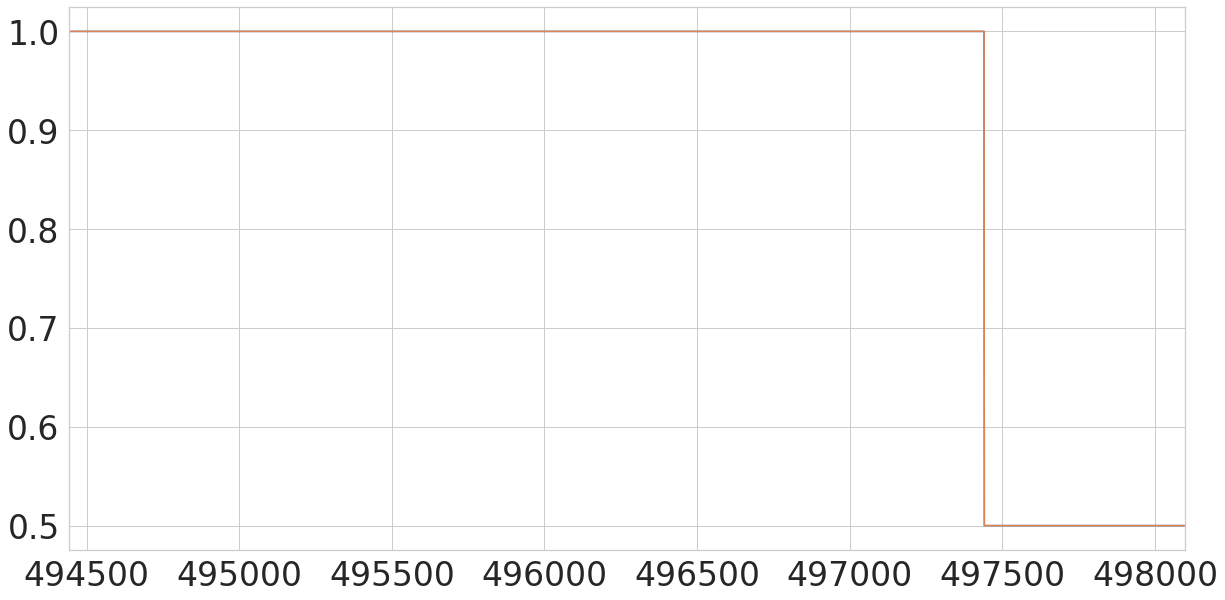

In [26]:
gb_learner_in_21['programme_state'].plot.line()
gb_learner_in_22['programme_state'].plot.line()


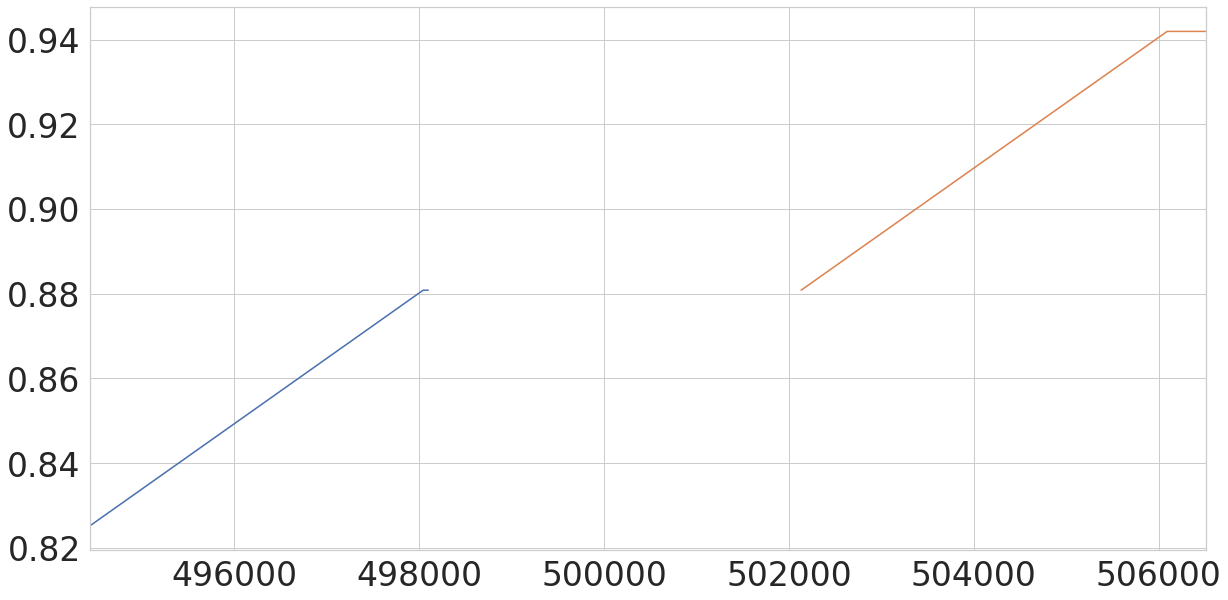

In [33]:
gb_learner_in_21['normalised_programme_time'].plot.line()
gb_learner_in_22['normalised_programme_time'].plot.line()

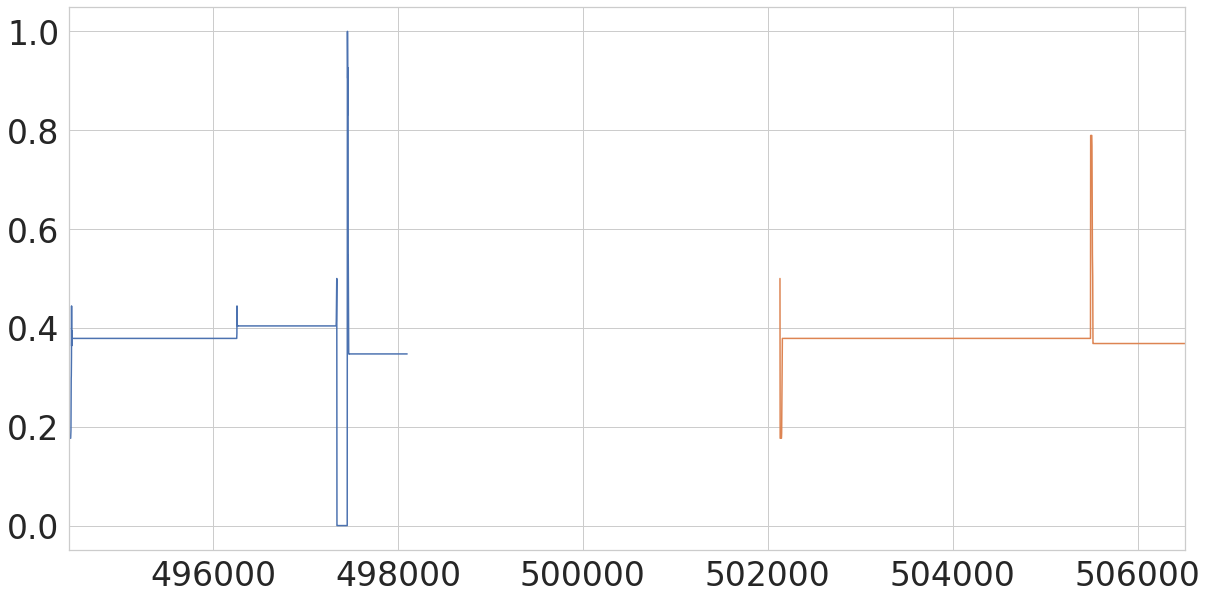

In [37]:
gb_learner_in_21['relative_speed_best'].plot.line()
gb_learner_in_22['relative_speed_best'].plot.line()

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(gb_learner_in_21)

        self_attitude  expert_attitude  extraversion  agreeableness  \
494443            0.8              1.0          0.78           0.85   
494444            0.8              1.0          0.78           0.85   
494445            0.8              1.0          0.78           0.85   
494446            0.8              1.0          0.78           0.85   
494447            0.8              1.0          0.78           0.85   
494448            0.8              1.0          0.78           0.85   
494449            0.8              1.0          0.78           0.85   
494450            0.8              1.0          0.78           0.85   
494451            0.8              1.0          0.78           0.85   
494452            0.8              1.0          0.78           0.85   
494453            0.8              1.0          0.78           0.85   
494454            0.8              1.0          0.78           0.85   
494455            0.8              1.0          0.78           0.85   
494456

In [71]:
dp_state_log_23 = state_log_df[(state_log_df['user_id']=='PT') & (state_log_df['session_number']==17)] 

In [85]:
dp_state_log_23['au12'].isna().sum()
#dp_state_log_23['prog_action_duration'].plot()

3571